## Exercise

Consider a random variable X with values in:

$$ A_X = \big \{ x_1, . . ., x_8 \big \} $$

and probability mass function

$$PX = \bigg \{ \dfrac{1}{4},\dfrac{1}{4},\dfrac{1}{4},\dfrac{3}{16},\dfrac{1}{64},\dfrac{1}{64},\dfrac{1}{64}, \dfrac{1}{64} \bigg \}$$

* What is the information content of each outcome $x_i$?

* What is the entropy of the distribution?

* Draw a binary probability tree for X. For each node, write the corresponding envent; 
for each edge, write the corresponding conditional probability
* Plot the essential bit content $H_{\delta}(X)$ as a function of the error $\delta$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib

In [2]:
# Dictionary mapping each outcome to its probability
outcomes_prob_dict = {'x1': 1/4, 'x2': 1/4, 'x3': 1/4, 'x4': 3/16, 'x5': 1/64, 'x6': 1/64, 'x7': 1/64, 'x8': 1/64}

# Dictionary mapping each outcome to its entropy
outcomes_entropy_dict = {outcome : -np.log2(outcomes_prob_dict[outcome]) for outcome in outcomes_prob_dict}

Text(0.5, 1.0, 'Information content of each outcome')

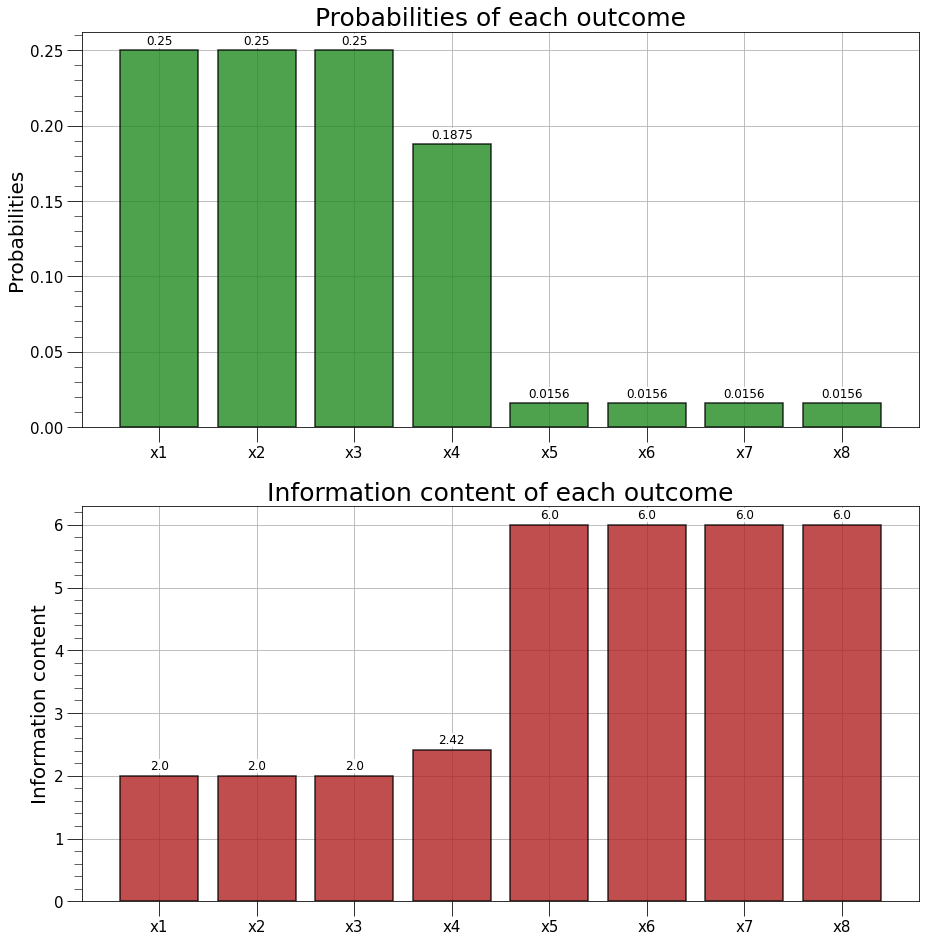

In [3]:
# Plotting the probabilities of each outcome
fig, ax = plt.subplots(2, 1, figsize = (15, 16))

ax[0].bar(outcomes_prob_dict.keys(), outcomes_prob_dict.values(), color = 'forestgreen', alpha = 0.8, \
          edgecolor = 'black', linewidth = 1.5, zorder = 2)

for outcome in outcomes_prob_dict:
    ax[0].text(outcome, outcomes_prob_dict[outcome] + 0.002, str(round(outcomes_prob_dict[outcome], 4)), ha = 'center', va = 'bottom', fontsize = 12,\
         zorder =2, bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'))

ax[0].grid(zorder = 1)
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=15, length=15)
ax[0].tick_params(axis='y', which='minor', labelsize=15, length=8)
ax[0].tick_params(axis='x', which='minor', labelsize=15, length=0)
ax[0].set_ylabel('Probabilities', fontsize = 20)
ax[0].set_title('Probabilities of each outcome', fontsize = 25)


# Plotting information content of each outcome

ax[1].bar(outcomes_entropy_dict.keys(), outcomes_entropy_dict.values(), color = 'firebrick', alpha = 0.8, edgecolor = 'black', linewidth = 1.5,\
    zorder = 2)

for outcome in outcomes_entropy_dict:
    ax[1].text(outcome, outcomes_entropy_dict[outcome] + 0.05, str(round(outcomes_entropy_dict[outcome], 2)), ha = 'center', va = 'bottom', fontsize = 12,\
         zorder =2, bbox=dict(facecolor='white', edgecolor= 'white', boxstyle='round, pad=0'))

ax[1].grid(zorder = 1)
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=15, length=15)
ax[1].tick_params(axis='y', which='minor', labelsize=15, length=8)
ax[1].tick_params(axis='x', which='minor', labelsize=15, length=0)
ax[1].set_ylabel('Information content', fontsize = 20)
ax[1].set_title('Information content of each outcome', fontsize = 25)


In [4]:
H = np.sum([outcomes_prob_dict[outcome] * outcomes_entropy_dict[outcome] for outcome in outcomes_prob_dict])

err_1 = np.sqrt( np.sum( [ ((np.log2(np.e*prob))**2 * prob * (1 - prob))/8 for prob in outcomes_prob_dict.values() ] ) )

print('The entropy of the distribution is: %2.4f ± %2.4f'  %(H, err_1)) 


The entropy of the distribution is: 2.3278 ± 0.4467


In [22]:
print( 1/64 )

0.015625


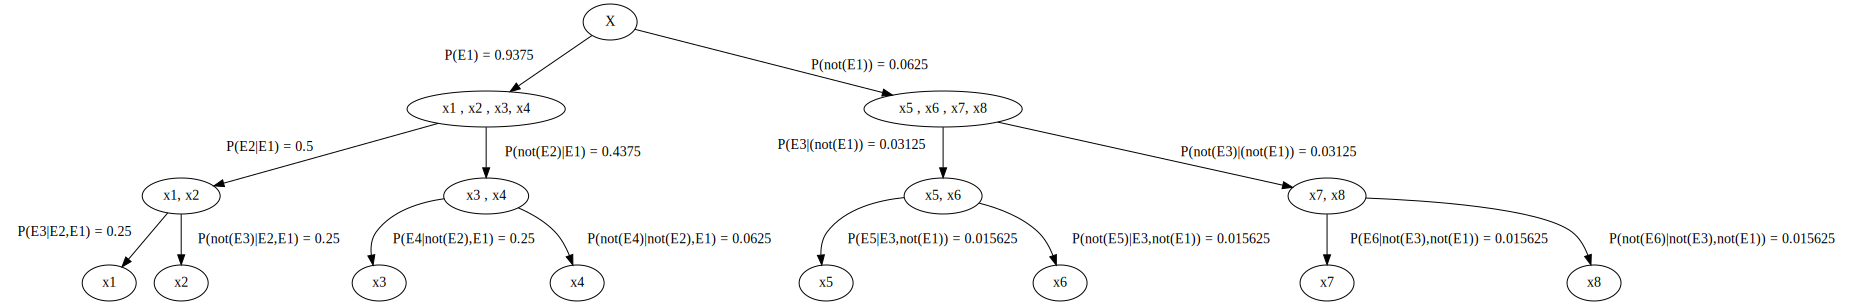

In [24]:
import graphviz

f = graphviz.Digraph(filename = 'binary_prob_tree.gv')
names = ['A','B','C','D','E','F','G','H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
positions = ['X',
             'x1 , x2 , x3, x4',  'x5 , x6 , x7, x8', 
             'x1, x2',  'x3 , x4',  'x5, x6',  'x7, x8', 
             'x1', 'x2',  'x3' , 'x4',  'x5', 'x6',  'x7', 'x8']

for name, position in zip(names, positions):
     f.node(name, position)
 
#Specify edges
f.edge ('A','B', xlabel=" P(E1) = 0.9375  " ); f.edge('A','C', label='P(not(E1)) = 0.0625') 
f.edge('B','D', xlabel='P(E2|E1) = 0.5 '); f.edge('B','E',  label='P(not(E2)|E1) = 0.4375 ')
f.edge('C','F',  xlabel='P(E3|(not(E1)) = 0.03125'); f.edge('C','G',  label='P(not(E3)|(not(E1)) = 0.03125 ')

f.edge('D','H',  xlabel='P(E3|E2,E1) = 0.25'); f.edge('D','I',  label='P(not(E3)|E2,E1) = 0.25')
f.edge('E','J',  label='P(E4|not(E2),E1) = 0.25'); f.edge('E','K',  label='P(not(E4)|not(E2),E1) = 0.0625')
f.edge('F','L', label='P(E5|E3,not(E1)) = 0.015625'); f.edge('F','M',  label='P(not(E5)|E3,not(E1)) = 0.015625')
f.edge('G','N',  label='P(E6|not(E3),not(E1)) = 0.015625'); f.edge('G','O',  label='P(not(E6)|not(E3),not(E1)) = 0.015625')

f

In [6]:
reversed_prob = dict(reversed(outcomes_prob_dict.items()))

In [7]:
cum_dict = {list(reversed_prob.keys())[i]: np.cumsum(list(reversed_prob.values()))[i] for i in range(len(reversed_prob))}

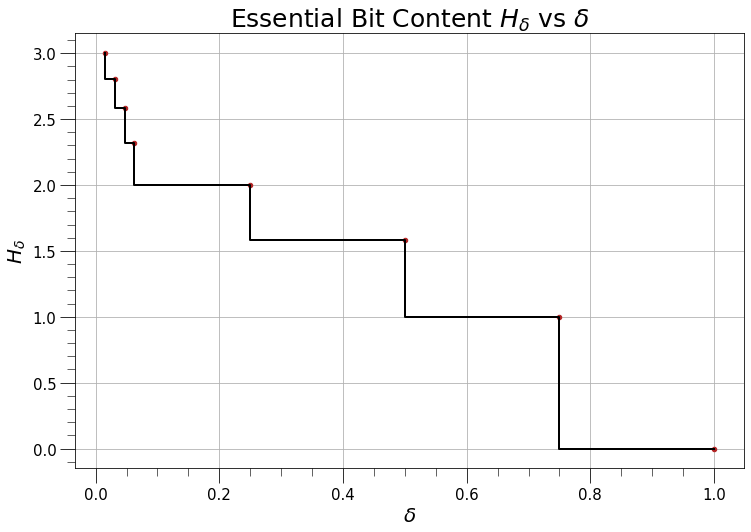

In [8]:
delta_values = np.array(list(cum_dict.values()))

essential_bit_contents = [ np.log2(len(delta_values) - i ) for i in range(len(delta_values))]

fig , ax = plt.subplots(figsize=(12,8))

ax.step(delta_values, essential_bit_contents, where = 'pre', color = 'black', linewidth = 2, zorder = 2)
ax.scatter(delta_values, essential_bit_contents, color = 'firebrick', s = 20, zorder = 2)


ax.set_title('Essential Bit Content $H_{\\delta}$ vs $\\delta$', fontsize = 25)    
ax.set_xlabel('$\\delta$', fontsize = 20)
ax.set_ylabel('$H_{\\delta}$', fontsize = 20)         

#ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## Second part

Consider $X^{(3)} = X × X × X $ :

* What is the entropy of $X^{(3)}$?
* Plot $H_{\delta}(X^{(3)})$ as a function of $\delta$
* How many binary strings we need to represent $X^{(3)}$ if we allow an error of
1%?


In [9]:
array_prob = np.array(list(outcomes_prob_dict.values()))

x, y, z = np.meshgrid(array_prob, array_prob, array_prob)

In [10]:
all_probabilities = x * y * z

flattened_prob = all_probabilities.flatten()

In [11]:
shannon_all = np.sum([ - prob * np.log2(prob) for prob in flattened_prob])

err_2 = np.sqrt( np.sum( [ ((np.log2(np.e*prob))**2 * prob * (1 - prob)) /512 for prob in flattened_prob]))


print('The Shannon Entropy of the text is:  H = %2.4f ± %2.4f'  %(shannon_all, err_2)  )

The Shannon Entropy of the text is:  H = 6.9835 ± 0.2547


In [12]:
sortened_prob = np.sort(flattened_prob)
deltas_all = np.cumsum(sortened_prob)

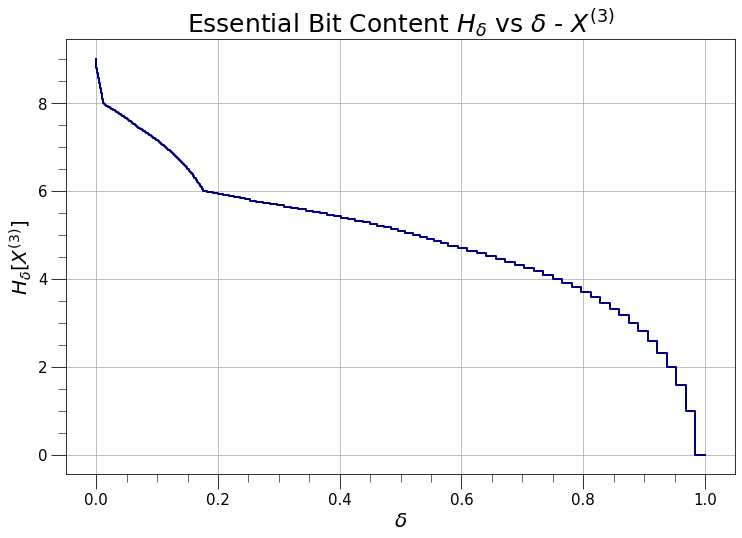

In [13]:
y_axis = [ np.log2(len(deltas_all) - i ) for i in range(len(deltas_all))]
x_axis = deltas_all

fig , ax = plt.subplots(figsize=(12,8))

ax.step(x_axis, y_axis, where = 'pre', color = 'navy', linewidth = 2, zorder = 2)


ax.set_title('Essential Bit Content $H_{\\delta}$ vs $\\delta$ - $X^{(3)}$', fontsize = 25)    
ax.set_xlabel('$\\delta$', fontsize = 20)
ax.set_ylabel('$H_{\\delta}[X^{(3)}]$', fontsize = 20)         

#ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

In [14]:
s_delta_length = len(deltas_all[deltas_all < 1/100])

In [15]:
bit = np.ceil(np.log2(s_delta_length))

print('If we allow an error of 1 %% to represent X(3) we need %1.0f binary strings' %bit)

If we allow an error of 1 % to represent X(3) we need 8 binary strings
